# Interpretable Machine Learning
## Exercise Sheet: 3 Feature Effect
### Presentation date: 20.11.2023

# 1) Partial Dependence Plot (PDP), Individual Conditional Expectation ICE, and c-ICE

In this task, the concepts of ICE, c-ICE, PDP will be explained. For this, you have to train a multilayer perceptron (MLP) on the regression dataset `sklearn.datasets.fetch_california_housing` and then implement the methods on your own.

## a) Data
Load the data and get familiar with it by extracting the features $X$ as a `pandas.DataFrame` and the target $Y$. Then, answer the following questions:

- What are the features and what are their types (numeric, binary, categorical)?
- What is the target outcome?

### Solution:

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()

# Get features as pd.DataFrame
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)

# Get target
Y = cal_housing.target

In [2]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

*   The dataset includes the following features (https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)
  * `MedInc`: Median income in block group (numerical)
  * `HouseAge`: Median house age in block group (numerical)
  * `AveRooms`: Average number of rooms per household (numerical)
  * `AveBedrms`: Average number of bedrooms per household (numerical)
  * `Population`: Block group population (numerical)
  * `AveOccup`: Average number of household members (numerical)
  * `Latitude`: Block group latitude (numerical)
  * `Longitude`: Block group longitude (numerical)

*   The target variable is the median house value for California districts in hundreds of thousands of dollars ($100,000)

## b) Train MLP
Create training and test data using the function `train_test_split` and train the predefined MLP model. Then calculate the $R^2$ value on the test data using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score) method.

**Hint:** Use function `fit(X_train, y_train)`.

### Solution:

In [4]:
# Create train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Define model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

model =  make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True
    )
)

# Train the model on the trainings data

model.fit(X_train, y_train)

# Calculate the R^2- value

f"Test R2 score: {model.score(X_test, y_test):.2f}"

'Test R2 score: 0.78'

## c) Implement ICE, c-ICE, PDP and create Plots
Now let's apply the method to the feature `HouseAge`.

**(i)** Implement ICE and create an ICE plot for feature `HouseAge`.

**Hint:** Get the minimum and maximum value of this feature and create a vector with the intermediate values (`np.linspace(min, max, 100)`). Insert these values into the test data in a loop and calculate the output. Finally, create a plot with `plt.plot`.

### Solution:

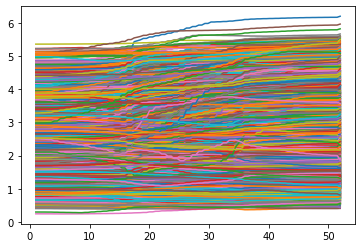

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get the domain for feature 'HouseAge'
min_value = min(X_test.HouseAge)
max_value = max(X_test.HouseAge)
HouseAge = np.linspace(min_value, max_value, 100)

# Calculate ICE
y = []
for i in HouseAge:
  x = X_test.copy()
  x.HouseAge = i
  y.append(model.predict(x))

# Plot ICE
plt.plot(HouseAge, y)
plt.show()

**(ii)** Implement c-ICE and create a c-ICE for feature `HouseAge`.

### Solution:

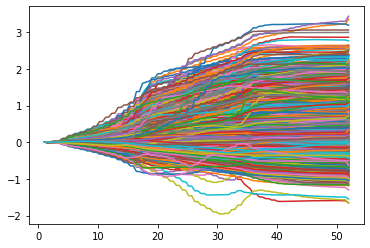

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Get the domain for feature 'HouseAge'
min_value = min(X_test.HouseAge)
max_value = max(X_test.HouseAge)
HouseAge = np.linspace(min_value, max_value, 100)

x_anchor = X_test.copy()
x_anchor.HouseAge = min_value
# Calculate c-ICE
y = []
for i in HouseAge:
  x = X_test.copy()
  x.HouseAge = i
  y.append(model.predict(x)-model.predict(x_anchor))

# Plot c-ICE
plt.plot(HouseAge, y)
plt.show()

**(iii)** Implement PDP and create a PDP for feature `HouseAge`.

**Hint:** Get the minimum and maximum value of this feature and create a vector with the intermediate values (`np.linspace(min, max, 100)`). Insert these values into the test data in a loop and calculate the average output. Finally, create a plot with `plt.plot`.

### Solution:

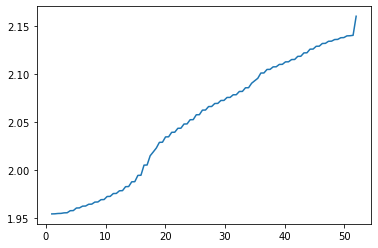

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Get the domain for feature 'HouseAge'
min_value = min(X_test.HouseAge)
max_value = max(X_test.HouseAge)
HouseAge = np.linspace(min_value, max_value, 100)

# Calculate PDP
y = []
for i in HouseAge:
  x = X_test.copy()
  x.HouseAge = i
  y.append(np.mean(model.predict(x)))

# Plot PDP
plt.plot(HouseAge, y)
plt.show()

## d) Create ICE, c-ICE and PDP for feature `HouseAge` with a predefined function and check your implementation.

In [8]:
#!pip install --upgrade scikit-learn

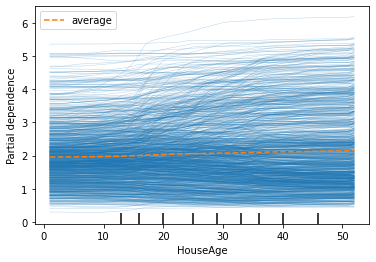

In [9]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features = ["HouseAge"],
    kind='both',
    grid_resolution=100
)

### Solution c-ICE:
Note: The orange line is the PDP

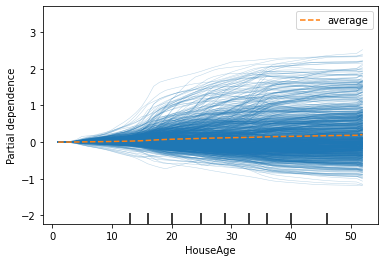

In [10]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features = ["HouseAge"],
    kind='both',
    centered= True,
    grid_resolution=100
)

### Solution PDP:

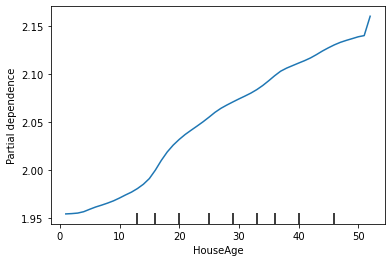

In [11]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features = ["HouseAge"],
    grid_resolution=100
)

## e) Also try out other features.

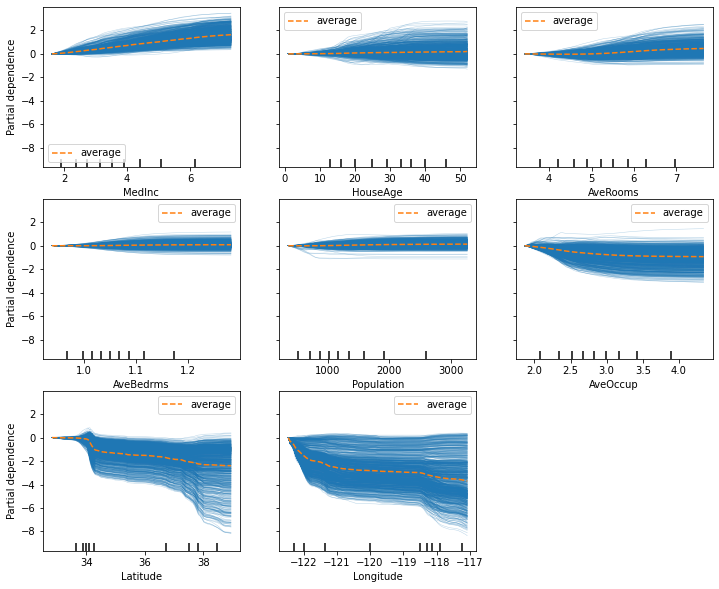

In [12]:
from sklearn.inspection import PartialDependenceDisplay

_, ax = plt.subplots(figsize=(12, 10))

display = PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["MedInc", "HouseAge", "AveRooms","AveBedrms","Population", "AveOccup","Latitude", "Longitude"],
    kind="both",
    centered= True,
    grid_resolution=100,
    ax=ax
)

For example for MedInc, AveOccup, HouseAge, AveRooms: We can clearly see on the PDPs (dashed orange line) that the median house price shows a linear relationship with the median income (MedInc) (top left) and that the house price drops when the average occupants (AveOccup) per household increases (middle right). The top middle plot shows that the house age (HouseAge) in a district does not have a strong influence on the (median) house price; so does the average rooms (AveRooms) per household.

The ICE curves (light blue lines) complement the analysis: we can see that there are some exceptions (which are better highlighted with the option centered=True), where the house price remains constant with respect to median income and average occupants variations. On the other hand, while the house age does not have a strong influence on the median house price on average, there seems to be a number of exceptions where the house price increases when between the ages 15-25. Similar exceptions can be observed for the average number of rooms. Therefore, ICE plots show some individual effect which are attenuated by taking the averages.

Source: https://scikit-learn.org/1.1/auto_examples/inspection/plot_partial_dependence.html

Note: If we would just look at the PDP plot of the HouseAge, the median house value increases with the age of the house. But if we look at the scale the increase is not so big.

## f) What do these plots tell us? Can they indicate the importance of the feature and if not, how do you get it?

### Solution:

**PDP**: A Partial Dependence Plot describes the influence of a feature on the target on average over the marginal distribution, i.e. every realization in the dataset is considered. In addition, it illustrates the relationship between one feature and the outcome, e.g. is it linear or non-linear? A flat PDP indicates that the feature is less important, and the more the PDP varies, the more important is the feature.

However, a single PDP can not be used to determine the importance of a feature because the variations need to be considered in relation to the other PDPs. This problem solves the following partial dependence-based feature importance measure proposed by Greenwell: For feature $i \in \{1, \ldots, K\}$ and $n$ samples
$$
I_i(x) = \sqrt{\frac{1}{K - 1} \sum_{k=1}^K\left( \hat{f}_i(x) - \frac{1}{K} \sum_{j = 1}^K \hat{f}_{j}(x)\right)^2}\quad \text{with}\quad \hat{f}_i(x) = \frac{1}{n} \sum_{k = 1}^n \hat{f}(x, x_C^{(k)})$$

**ICE**: ICE answers the question on how the prediction of individual observation changes. If we have parallel ICE curves we have a homogenous effect. It is important to plot ICE and PDP together, since averaging of ICE curves might obfuscate heterogeneous effects and interactions. See lecture 3.3 p.7.  

**C-ICE**: It is easier to identify heterogenous shapes with c-ICE. Careful, the interpreation is a bit different. (see lecture 3.3 p.9)

# 2) Accumulated Local Effects (ALE) Plots

## a*) (optional) Implement ALE from scratch. 

In [13]:
import sys
sys.path.insert(0, ".")

import pandas as pd
import numpy as np

def get_bounds(X, s, n_intervals=100):
    """
    Calculates interval bounds given a X's min and max values.
    Only values in the s-th column are considered.
    
    Parameters:
        X (np.array with shape (num_instances, num_features)): Input data.
        s (int): Index of the feature x_s.
        n_intervals (int): Number of intervals.
        
    Returns:
        bounds (list): Values of bounds with `n_intervals`+1 entries.
    """
    
    x_s = X[:, s]
    x_s_min = np.min(x_s)
    x_s_max = np.max(x_s)
    bounds = list(np.linspace(x_s_min, x_s_max, n_intervals+1))
    
    return bounds

In [14]:
def calculate_ale(model, X, s, n_intervals=100, centered=False):
    """
    Compute the accumulated local effect of a numeric continuous feature.
    
    Parameters:
        model: Classifier which has a predict method.
        X (np.array with shape (num_instances, num_features)): Input data.
        s (int): Index of the feature x_s.
        n_intervals (int): How many intervals should be used.
        centered (bool): Whether to return uncentered or centered ALE.
        
    Returns:
        bounds (list): See function `get_bounds`.
        ale (list with `n_intervals` entries): Values of ALE.
    """

    x_s = X[:, s]
    bounds = get_bounds(X, s, n_intervals)
    
    uncentered_ale = []
    
    for i1, i2 in zip(bounds, bounds[1:]):
        # Get ids in between the interval
        if i1 == bounds[0]:
            # Make sure to include the point on the first intervall too
            idx = np.where((x_s >= i1) & (x_s <= i2))[0]
        else:
            idx = np.where((x_s > i1) & (x_s <= i2))[0]
            
        if len(idx) == 0:
            uncentered_ale.append(0)
            continue
        
        # Now we replace the values at position s one time with smallest value
        # and one time with the highest value in this interval.
        X_min = X[idx, :]
        X_max = X[idx, :]
        X_min[:, s] = i1
        X_max[:, s] = i2
        
        # And get the new predictions
        y_min = model.predict(X_min)
        y_max = model.predict(X_max)
        
        # Calculate difference now
        diff = y_max - y_min
        uncentered_ale_k = np.sum(diff) / len(idx)
        uncentered_ale.append(uncentered_ale_k)
    
    # Now accumulate
    uncentered_ale = np.cumsum(uncentered_ale)
    
    if centered:
        # Center ALE here
        centered_ale = []
        mean_uncentered_ale = np.sum(uncentered_ale) / len(uncentered_ale)
        for uncentered_ale_k in uncentered_ale:
            centered_ale_k = uncentered_ale_k - mean_uncentered_ale
            centered_ale.append(centered_ale_k)
            
        return bounds, centered_ale
    else:
        return bounds, uncentered_ale

In [15]:
def prepare_ale(model, X, s, n_intervals=100, centered=False):
    """
    Uses `calculate_ale` to prepare x and y data, which can be used
    by matplotlib directly.
    
    Parameters:
        model: Classifier which has a predict method.
        X (np.array with shape (num_instances, num_features)): Input data.
        s (int): Index of the feature x_s.
        n_intervals (int): How many intervals should be used.
        centered (bool): Whether to return uncentered or centered ALE.  
        
    Returns:
        x (list or 1D np.ndarray): Centers of two bounds. `n_intervals` entries.
        y (list or 1D np.ndarray): ALE values. `n_intervals` entries.
    """
    bounds, y = calculate_ale(model, X, s, n_intervals, centered)
    x = [(i1+i2)/2 for i1, i2 in zip(bounds, bounds[1:])]
    
    return x, y

Run `get_bounds` ...
[1.0, 13.75, 26.5, 39.25, 52.0]
Plot ...


/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/home/pegah/anaconda3/lib/python3.9/site

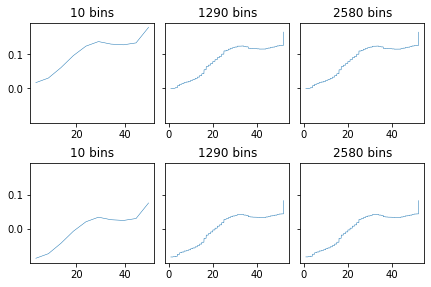

In [16]:
from sklearn import ensemble
#feature we are interested in, here HouseAge
s = 1

print("Run `get_bounds` ...")
print(get_bounds(np.array(X), 1, n_intervals=4))

num_samples = X.shape[0]
#n_intervals = [int(num_samples/16), int(num_samples/8), int(num_samples/4)]
n_intervals=[10, int(num_samples/16), int(num_samples/8)]
num_features =  X.shape[1] 

print("Plot ...")
plt.subplots(ncols=len(n_intervals), nrows=2, sharey=True)
for row_id, centered in enumerate([False, True]):
    for col_id, k in enumerate(n_intervals):

        plt.subplot(2, len(n_intervals), col_id+1+len(n_intervals)*row_id)
        plt.title(f"{k} bins")
        if col_id == 0:
            centered_text = ""
            if not centered:
                centered_text = "Uncentered"

        x, y = prepare_ale(model, np.array(X), s, n_intervals=k, centered=centered)
        plt.plot(x, y, linewidth=0.5)

plt.tight_layout(pad=0.75)
plt.show()

import warnings
warnings.filterwarnings('ignore')

# b) Example: ALE Plot

**i)** Install the package [ALEPython](https://github.com/blent-ai/ALEPython) from Github and create an ALE plot for the example from task **1)** as well for the feature `HouseAge`.

**Hint:** See the 'Install' and 'Usage' section on the Github page.

In [17]:
# Install package
# To use a code chunk as a console the line must start with '!'.

#!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install alepython

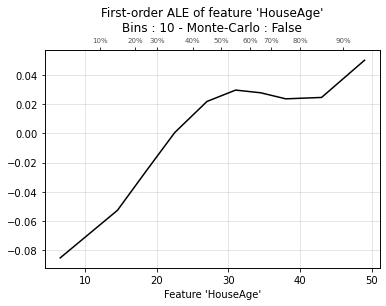

In [18]:
# Create the ALE plot (set 'monte_carlo = False')

from alepython import ale_plot
ale_plot(model, X_train, 'HouseAge')
plt.show()

**ii)** (optional) Compare with your own implementation from a).

Similar shape, the y-axis is different.

**iii)** How does the ALE plot differ from the PDP in task 1? Give possible reasons for the similarities or differences.

**Solution:** 
    
* ALE plots show the relative effect by centering at zero
* We see that newer houses have a negative effect and older ones have a positive effect on the sales price. We could not see that in the PDP because they are not centered, i.e. no subtraction of the average effect.
* In our case, the plots look similar for values <40, which might be due to the very low correlation from this feature to the others, at the edge values (>50) a slight difference is observed, as the PDP keeps increasing while ALE shows a slight dent, this might be due to feature correlation or few values available in this region.
* If we look at the scale (of the y-axis) the effect is actually not so big.

**Note:** Of course, the plots may look different for other seeds (especially at the edges where there are few data points).